# Classification results rendered

Displays all plots and metrics generated in the metrics and visualization stages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import yaml
from pathlib import Path
from IPython.display import Image

from src import paths

In [3]:

params_path: Path = paths.config_dir("params.yaml")
fault_detection_dir: Path = paths.data_processed_dir("fault_detection")
metrics_dir: Path = paths.reports_dir("metrics")
plots_dir: Path = paths.reports_dir("figures")

with open(params_path, "r") as file:
    params = yaml.safe_load(file)

# Parameters
selected_band: str = params["selected_band"]
selected_score: str = params["parameter_study_max_metric_prefix"]


# Optimal plots

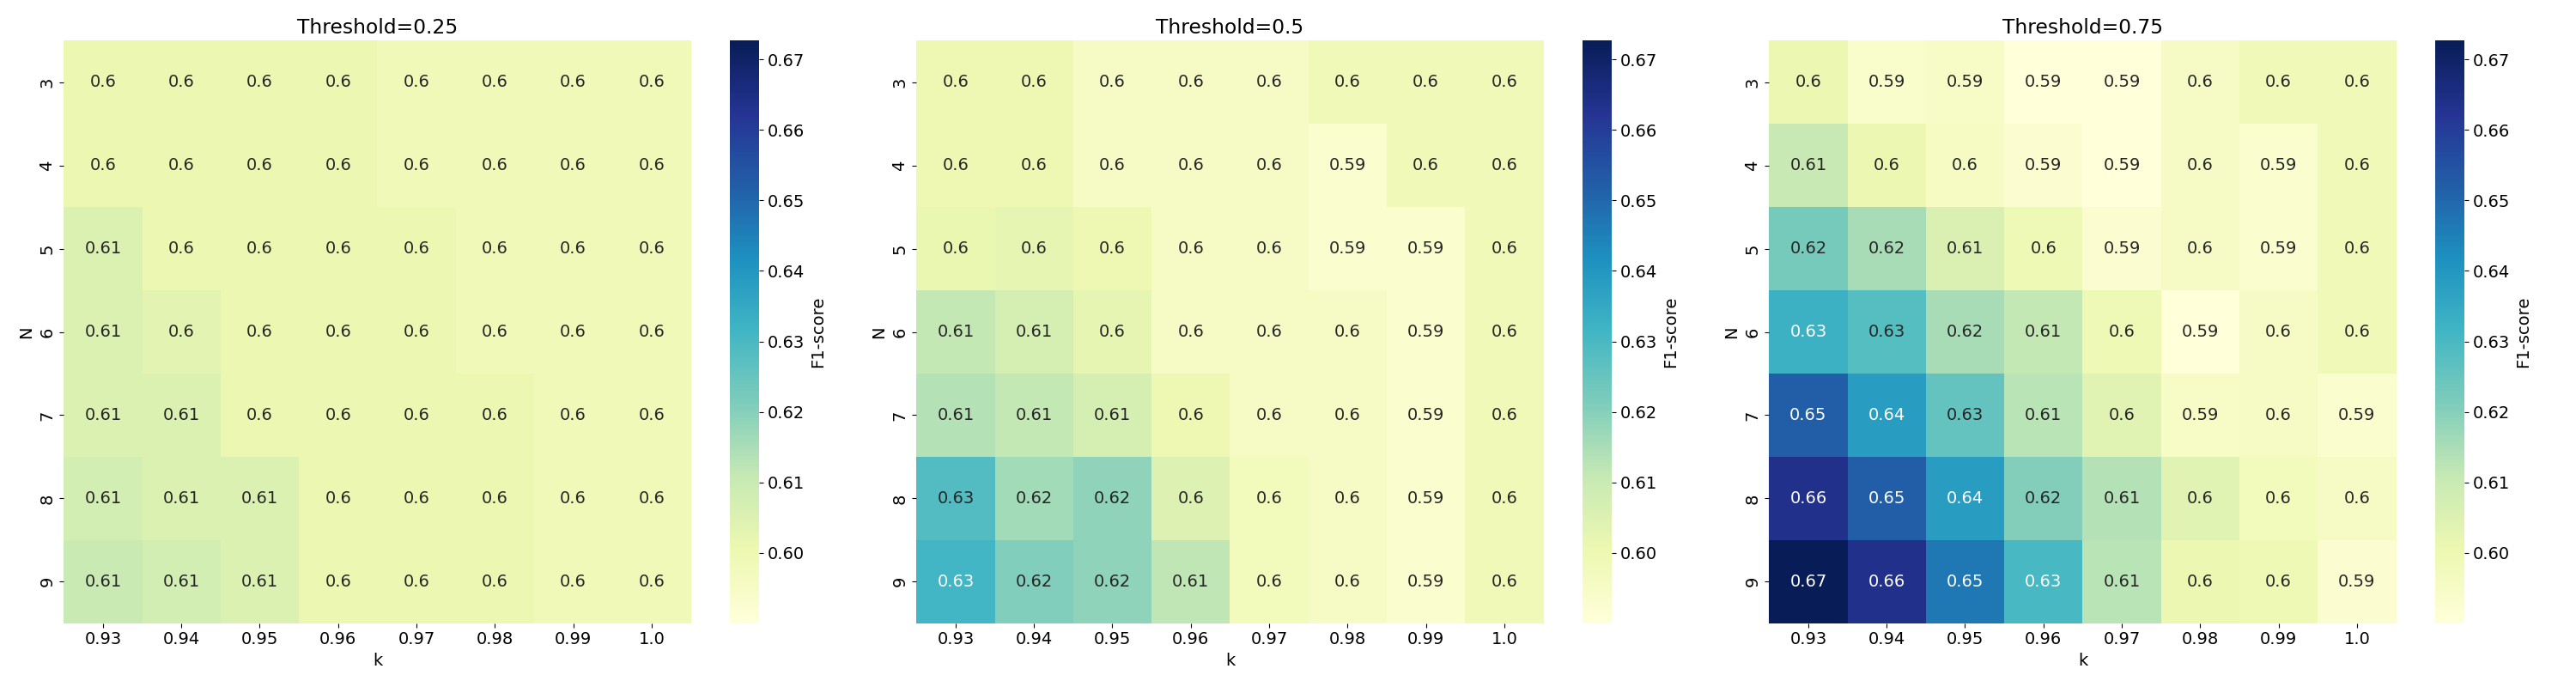

In [4]:
scores_over_params_plot_filename = "_".join([selected_band, selected_score, "over_params"])
scores_over_params_plot_filename += ".png"
scores_over_params_plot_path = plots_dir / scores_over_params_plot_filename

Image(scores_over_params_plot_path)

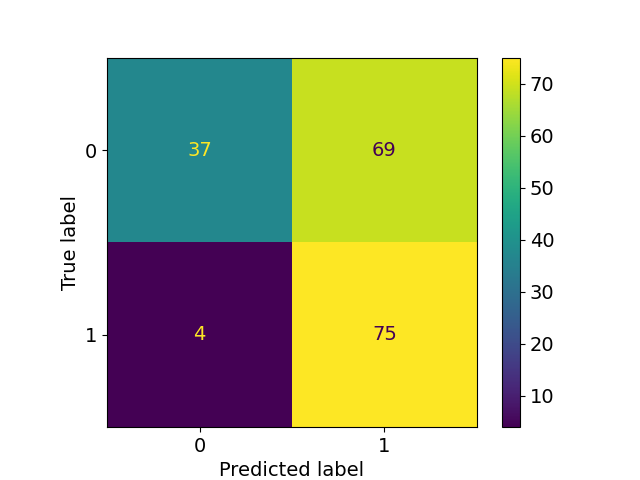

In [5]:
cm_display_filename = "_".join(
        ["max",
         selected_score,
         "cm",
         selected_band])

cm_display_filename += ".png"

cm_display_path = plots_dir / cm_display_filename

Image(cm_display_path)

In [6]:
classification_report_filename = "_".join(
        ["max",
         selected_score,
         "classification_report",
         selected_band]
    )
classification_report_filename += ".csv"
classification_report_path = metrics_dir / classification_report_filename
report_df = pd.read_csv(classification_report_path)

report_df

,Unnamed: 0,precision,recall,f1-score,support
0,0,0.902439,0.349057,0.503401,106.000000
1,1,0.520833,0.949367,0.672646,79.000000
2,accuracy,0.605405,0.605405,0.605405,0.605405
3,macro avg,0.711636,0.649212,0.588024,185.000000
4,weighted avg,0.739483,0.605405,0.575673,185.000000


In [7]:
detailed_cm_percentages_filename = "_".join(
        ["max",
         selected_score,
         "detailed_per_cm", selected_band,
         ]
    )

detailed_cm_percentages_filename += ".csv"
detailed_cm_percentages_path = metrics_dir / detailed_cm_percentages_filename
detailed_cm_precentages = pd.read_csv(detailed_cm_percentages_path)

detailed_cm_precentages

,change_type,label,prediction,proportion
0,drought,0,1.0,0.281081
1,logging,1,1.0,0.281081
2,stable,0,0.0,0.140541
3,fire,1,1.0,0.124324
4,stable,0,1.0,0.091892
5,drought,0,0.0,0.059459
6,fire,1,0.0,0.021622


In [8]:
detailed_cm_abosolutes_filename = "_".join(
        ["max",
         selected_score,
         "detailed_abs_cm", selected_band,
         ]
    )
detailed_cm_abosolutes_filename += ".csv"
detailed_cm_abosolutes_path = metrics_dir / detailed_cm_abosolutes_filename
detailed_cm_abosolutes = pd.read_csv(detailed_cm_abosolutes_path)

detailed_cm_abosolutes

,change_type,label,prediction,count
0,drought,0,1.0,52
1,logging,1,1.0,52
2,stable,0,0.0,26
3,fire,1,1.0,23
4,stable,0,1.0,17
5,drought,0,0.0,11
6,fire,1,0.0,4


# Plots by event type

In [15]:
non_change_type = "stable" # stable drought
change_type = "logging" # logging fire

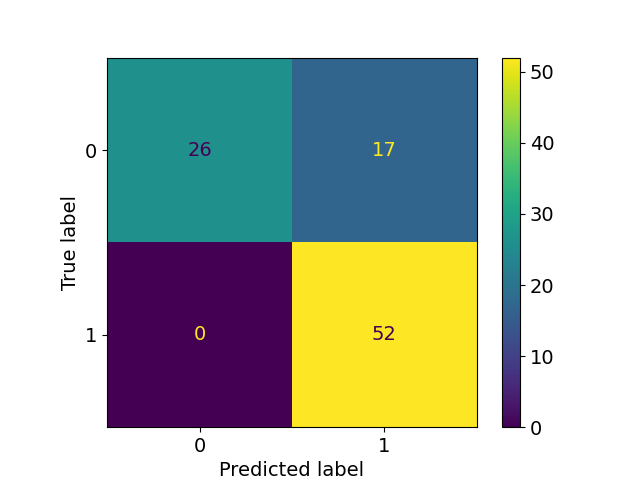

In [16]:
cm_display_filename = "_".join([
            "max",
            selected_score,
            "cm",
            selected_band,
            non_change_type,
            change_type
        ])

cm_display_filename += ".png"

cm_display_path = plots_dir / cm_display_filename

Image(cm_display_path)

In [17]:


classification_report_filename = "_".join([
    "max",
    selected_score,
    "classification_report",
    selected_band,
    non_change_type,
    change_type
])
classification_report_filename += ".csv"
classification_report_path = metrics_dir / classification_report_filename
report_df = pd.read_csv(classification_report_path)

report_df

,Unnamed: 0,precision,recall,f1-score,support
0,0,1.000000,0.604651,0.753623,43.000000
1,1,0.753623,1.000000,0.859504,52.000000
2,accuracy,0.821053,0.821053,0.821053,0.821053
3,macro avg,0.876812,0.802326,0.806564,95.000000
4,weighted avg,0.865141,0.821053,0.811579,95.000000
